In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium

from sklearn import preprocessing 

# minus 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_csv('./생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding='EUC-KR')

In [4]:
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42694,1636118,226,롯데마트 구로점,171,달걀(10개),10개(600g),2990,2021-01,"국내산,특란",2,대형마트,530000,구로구,2021-01-21
42695,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
42696,1636114,226,롯데마트 구로점,312,애호박,1개 (300g),2790,2021-01,"국내산,청원",2,대형마트,530000,구로구,2021-01-21
42697,1636113,226,롯데마트 구로점,22,오이,1개 (200g),1190,2021-01,"국내산,백오이",2,대형마트,530000,구로구,2021-01-21


In [5]:
df.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

# 데이터확인

In [7]:
df['시장/마트 번호'].nunique()

102

In [8]:
df['시장/마트 번호'].unique()

array([  2, 228,   1,  25,   6,  10,  51, 207,  32, 109,  22,  16,  56,
        42,  86,  38,  20,  40,  62,  85,  82,  98,  88,  21,  90,  84,
        63,  80,  68,  78,  66, 100,  72,  31, 133, 102, 103,  74, 200,
       120, 145, 218, 130, 127, 121,  27,  96,  94,  60,  75,  28,  44,
       108,  53,  73,  45, 212,  33, 223, 129, 219, 115,  55,  19,  11,
       140, 114, 210, 224, 110,  26, 147, 214, 148,  49, 116, 151,  92,
       221, 205, 123, 216, 134,  13, 215, 135, 136, 213,   8, 146,  14,
       220,  15, 153, 154, 199, 222,  91, 206, 227, 225, 226])

In [13]:
# 시장/마트 목록
df_market = df[['시장/마트 번호', '시장/마트 이름', '자치구 이름', 
    '시장유형 구분(시장/마트) 이름']].drop_duplicates()       # drop_duplicates(): Return DataFrame with duplicate rows removed.

In [15]:
# 자치구별 시장/마트 갯수
df_market['자치구 이름'].value_counts()

중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: 자치구 이름, dtype: int64

In [16]:
# 자치구 이름으로 시장/마트 확인
df_market[df_market['자치구 이름'] == '중구']

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
21,56,롯데백화점,중구,대형마트
257,60,이마트 청계점,중구,대형마트
576,11,남대문시장,중구,전통시장
3799,8,롯데마트 서울역점,중구,대형마트
4920,199,서울중앙시장,중구,전통시장


In [20]:
# 품목 목록
df_items = df[['품목 번호', '품목 이름']].drop_duplicates()
df_items[:30]

,품목 번호,품목 이름
0,133,무(세척무)
1,23,상추
2,266,"고등어(생물,국산)"
3,268,"고등어(냉동,국산)"
4,171,달걀(10개)
5,22,오이
6,312,애호박
7,24,양파
8,58,"쇠고기(한우,불고기)"
9,307,배추(2.5~3kg)


In [21]:
df_items[30:60]

,품목 번호,품목 이름
54,264,"명태(냉동,수입산)"
56,276,배(신고)
58,28,사과
79,25,무
97,278,쇠고기
103,308,무(1kg)
114,259,"조기(냉동,국산)"
135,304,고등어
157,27,배
177,260,"조기(냉동,수입산)"


In [22]:
df_items[60:]

,품목 번호,품목 이름
1550,318,"고등어(30cm,수입산)"
1820,284,배(중품)
1898,118,"호박(인큐베이터),중간"
2191,272,양파(작은망)
2432,274,"무(세척무, 중)"
2457,265,"명태(생물,수입산)"
2466,175,배추(중간)
2567,255,"오징어(생물,수입산)"
2620,54,오징어(냉동)
3706,313,"냉동참조기(20cm,수입)"


In [26]:
# 자치구 목록
df_gu = df[['자치구 코드', '자치구 이름']].drop_duplicates()
df_gu.shape

(25, 2)

In [30]:
# 시장유형 category                                                                         
df[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']].drop_duplicates()

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


# 삼겹살 가격 분석

In [31]:
df.head(4)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24


In [37]:
# 특정 문자열이 포함되어 있는지 확인   .str.contains(문자열)
df_sam = df[(df['품목 이름'].str.contains('삼겹살')) & 
            (df['년도-월'] == '2021-06') & 
            (df['실판매규격'].str.contains('600g'))]
df_sam

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,1668261,100,홈플러스 중계점,99,돼지고기(생삼겹살),600g,22140,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
6514,1674124,40,홈플러스 등촌점,99,돼지고기(생삼겹살),600g,14940,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [ ]:
# 삼겹살 가격의 평균
# 최대값 
# 조건: 5000원 이하인 시장/마트이름
# 최저가 

In [40]:
df_sam['가격(원)'].mean()

16842.723214285714

In [41]:
df_sam['가격(원)'].max()

35890

In [47]:
df_sam['가격(원)'].min()

1690

In [54]:
# df[df_sam['가격(원)'] <= 5000]['시장/마트 이름']

df_sam[df_sam['가격(원)'] <= 5000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3645,1667404,27,이마트 창동점,99,돼지고기(생삼겹살),600g,2720,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


In [55]:
mask = df_sam['가격(원)'] <= 5000
df_sam[mask]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3645,1667404,27,이마트 창동점,99,돼지고기(생삼겹살),600g,2720,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


# 우리동네 삼겹살 가격

In [62]:
gu = input('구이름 : ')

구이름 : 도봉구


In [73]:
조건 = df_sam['자치구 이름'] == gu
df_sam_gu = df_sam[조건][['시장/마트 이름', '품목 이름', '실판매규격', '가격(원)']].drop_duplicates()
df_sam_gu

,시장/마트 이름,품목 이름,실판매규격,가격(원)
2689,방학동도깨비시장,돼지고기(생삼겹살),600g,13800
2698,방학동도깨비시장,돼지고기(생삼겹살),600g,12000
3100,신창시장,돼지고기(생삼겹살),600g,13980
3188,신창시장,돼지고기(생삼겹살),600g,15180
3205,신창시장,돼지고기(생삼겹살),600g,12500
3593,이마트 창동점,돼지고기(생삼겹살),600g,14100
3603,이마트 창동점,돼지고기(생삼겹살),600g,18600
3645,이마트 창동점,돼지고기(생삼겹살),600g,2720
3979,홈플러스 방학점,돼지고기(생삼겹살),600g,12140
4024,홈플러스 방학점,돼지고기(생삼겹살),600g,22140


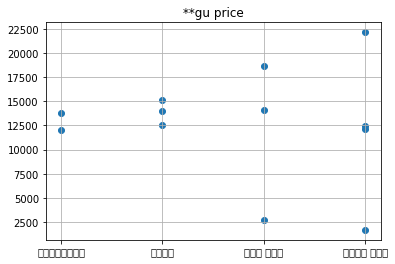

In [68]:
# 시각화
x = df_sam_gu['시장/마트 이름']
y = df_sam_gu['가격(원)']
plt.scatter(x, y)
plt.title('**gu price')
plt.grid()
plt.show()

# 마트 지점별 삼겹살 가격

In [79]:
mart = input('시장/마트이름 : ') # 입력 백화점

시장/마트이름 : 백화점


In [80]:
# 마트 지점별 삼겹살 가격      시장/마트이름 -> 품목이름 -> 실판매규격 -> 가격(원)
# 시각화

In [81]:
조건 = df_sam['시장/마트 이름'].str.contains(mart)
df_sam_mart = df_sam[조건][['시장/마트 이름', '품목 이름', '실판매규격', '가격(원)']].drop_duplicates()
df_sam_mart

,시장/마트 이름,품목 이름,실판매규격,가격(원)
22,현대백화점 미아점,돼지고기(생삼겹살),"600g (100g 4,280원)",25680
47,롯데백화점 노원점,돼지고기(생삼겹살),600g,26940
457,현대백화점 신촌점,돼지고기(생삼겹살),600g(1등급),25700
2576,태평백화점,돼지고기(생삼겹살),600g,21360
2617,태평백화점,돼지고기(생삼겹살),600g,19000
2661,태평백화점,돼지고기(생삼겹살),600g,23760
2681,태평백화점,돼지고기(생삼겹살),600g,20160
2751,롯데백화점 영등포점,돼지고기(생삼겹살),600g,27480
2989,롯데백화점 미아점,돼지고기(생삼겹살),600g,15760
3013,롯데백화점 미아점,돼지고기(생삼겹살),600g,20160


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

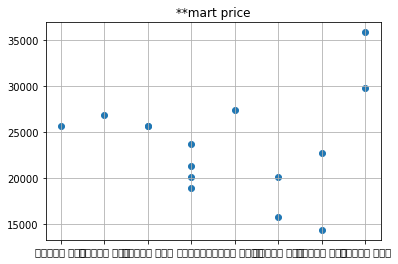

In [82]:
# 시각화
x = df_sam_mart['시장/마트 이름']
y = df_sam_mart['가격(원)']
plt.scatter(x, y)
plt.title('**mart price')
plt.grid()
plt.show()

# 달걀 분석

In [ ]:
# 21-6월, 데이터프레임 규격: 30개
# 30개 평균가격, 최대,최소,  6000이하가 어디인지
# 여러분들 동네 달걀가격, 백화점 지점별 달걀 가격

In [105]:
df_egg = df[(df['품목 이름'] == '달걀(30개)') & 
            (df['년도-월'] == '2021-06') ]
#df_egg = df_egg[:30]
df_egg

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
11,1671112,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,1667596,102,목3동시장,320,달걀(30개),30구,10100,2021-06,"국내산,정심특란",1,전통시장,470000,양천구,2021-06-24
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24
6779,1674903,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24


In [106]:
print(df_egg['가격(원)'].mean())
print(df_egg['가격(원)'].max())
print(df_egg['가격(원)'].min())

9006.852713178294
75000
0


In [107]:
mask = df['가격(원)'] <= 6000
df_egg[mask]

<ipython-input-107-1978e0a65424>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_egg[mask]


,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
1139,1671027,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
1477,1669024,75,이마트 성수점,320,달걀(30개),30개,5520,2021-06,국내산신선한란,2,대형마트,200000,성동구,2021-06-24
3953,1671893,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
3982,1669551,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
4049,1668111,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
4057,1674534,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
5002,1669143,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
5051,1673719,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
5092,1667271,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24


In [108]:
# 백화점 지점별 달걀 가격
df_bak = df_egg.groupby('시장/마트 이름').mean()['가격(원)']
df_bak

시장/마트 이름
NC백화점 불광점      8890.0
NC백화점 신구로점     8990.0
경동시장           8800.0
고척근린시장         7875.0
공릉동 도깨비시장      9875.0
               ...   
홈플러스 월드컵점      8660.0
홈플러스 잠실점      11470.0
홈플러스 중계점       7197.5
화곡본동시장         9750.0
후암시장           9250.0
Name: 가격(원), Length: 98, dtype: float64